## Importando librerías

In [65]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import os

import matplotlib.pyplot as plt
import itertools

import cv2

## Workshop 1

1. Hacer un programa que cargue una imagen y la guarde en otros formatos (tiff, png, bmp, jpg).

2. Compare visualmente los resultados obtenidos en los nuevos formatos. Revise las dimensiones de las imágenes, para ver si se conserva la resolución.

In [66]:
image_route = "images/kirkjufell.jpg"
picture = Image.open(image_route)

print("Formato original:", picture.format)
print("Tamaño (ancho x alto):", picture.size)
print("Modo de color:", picture.mode)

os.makedirs("outputs_workshop_1", exist_ok=True)

formats = ["TIFF", "PNG", "BMP", "JPEG"]

for fmt in formats:
    output_name = f"outputs_workshop_1/converted_picture.{fmt.lower()}"

    # Check if the file already exists
    if os.path.exists(output_name):
        print(f"Skipping {fmt}: already exists.")
        continue

    # Save the file if it doesn't exist
    picture.save(output_name, fmt)
    print(f"Stored at: {output_name}")

print("\nComparing sizes...")
for fmt in formats:
    route = f"outputs_workshop_1/converted_picture.{fmt.lower()}"
    if os.path.exists(route):
        with Image.open(route) as img:
            print(f"{fmt}: {img.size}")

# Safety measure
picture.close()

Formato original: JPEG
Tamaño (ancho x alto): (1095, 730)
Modo de color: RGB
Skipping TIFF: already exists.
Skipping PNG: already exists.
Skipping BMP: already exists.
Skipping JPEG: already exists.

Comparing sizes...
TIFF: (1095, 730)
PNG: (1095, 730)
BMP: (1095, 730)
JPEG: (1095, 730)


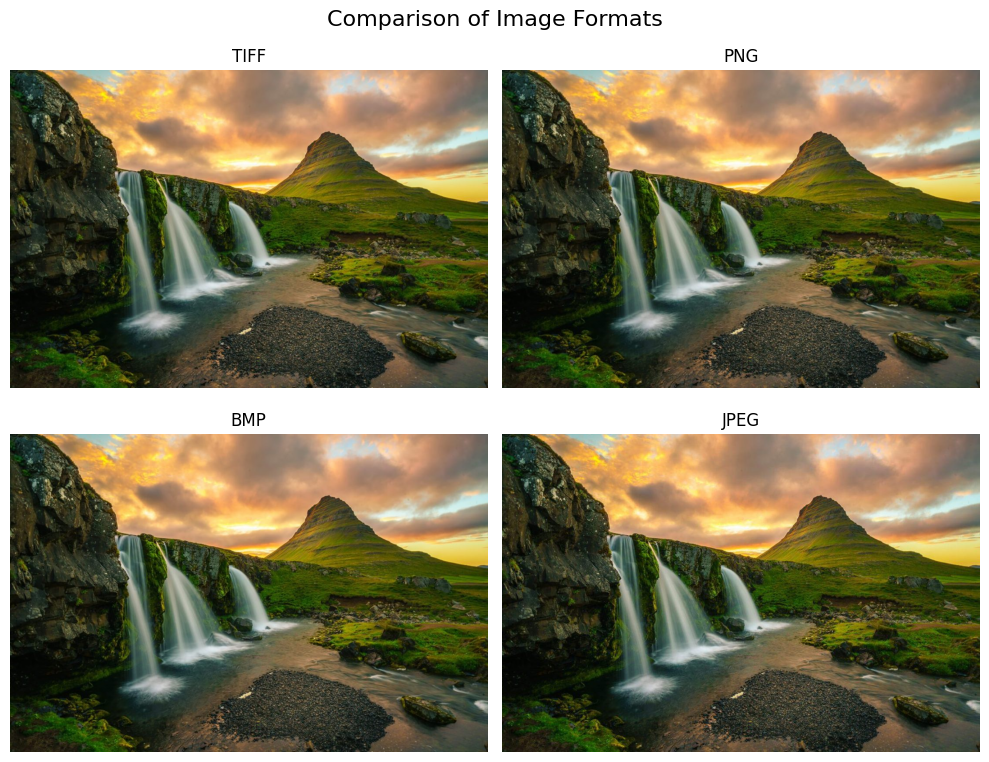

In [67]:
routes = [f"outputs_workshop_1/converted_picture.{fmt.lower()}" for fmt in formats]

# Create a 2x2 grid for display
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, route, fmt in zip(axes.flat, routes, formats):
    img = Image.open(route)
    ax.imshow(img)
    ax.set_title(fmt)
    ax.axis("off")  # hide axes for clarity

plt.suptitle("Comparison of Image Formats", fontsize=16)
plt.tight_layout()
plt.show()

TIFF: (730, 1095, 3)
PNG: (730, 1095, 3)
BMP: (730, 1095, 3)
JPEG: (730, 1095, 3)
Difference TIFF vs PNG: 0.00
Difference TIFF vs BMP: 0.00
Difference TIFF vs JPEG: 1.48
Difference PNG vs BMP: 0.00
Difference PNG vs JPEG: 1.48
Difference BMP vs JPEG: 1.48


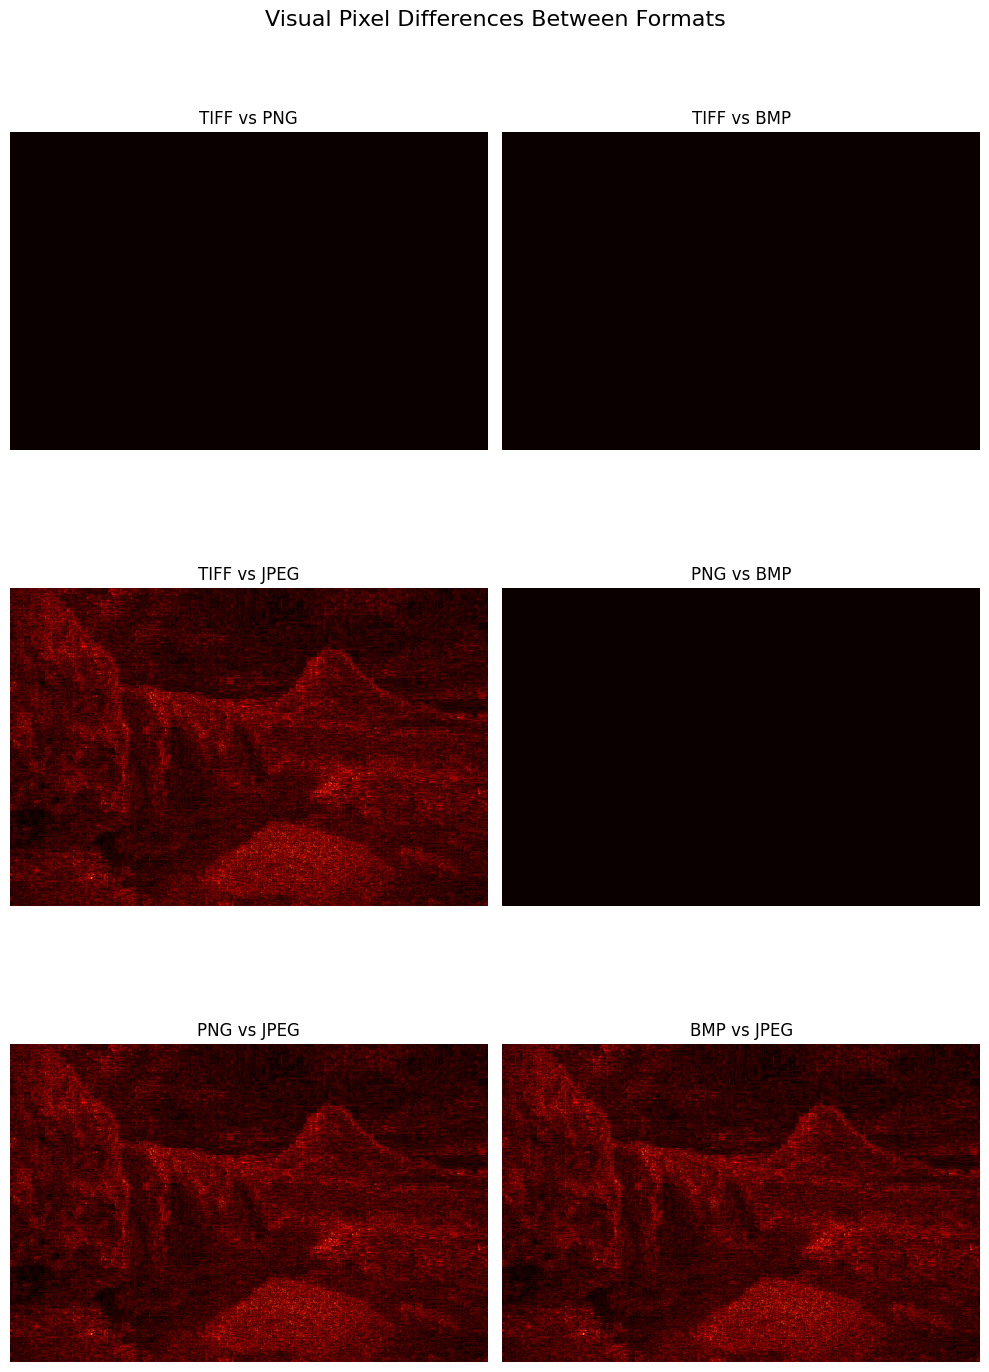

In [68]:
paths = [f"outputs_workshop_1/converted_picture.{fmt.lower()}" for fmt in formats]

images = {fmt: np.array(Image.open(path).convert("RGB")) for fmt, path in zip(formats, paths)}

for fmt, arr in images.items():
    print(f"{fmt}: {arr.shape}")

# Generate all unique pairs of formats
pairs = list(itertools.combinations(formats, 2))

# Plot difference maps
fig, axes = plt.subplots(len(pairs)//2, 2, figsize=(10, 15))
axes = axes.flatten()

for ax, (fmt1, fmt2) in zip(axes, pairs):
    img1, img2 = images[fmt1], images[fmt2]

    # Compute pixel difference
    diff = np.abs(img1.astype(int) - img2.astype(int))
    diff_magnitude = np.mean(diff, axis=2)  # average across RGB channels

    mae = np.mean(diff)
    print(f"Difference {fmt1} vs {fmt2}: {mae:.2f}")

    # Normalizing
    diff_display = diff_magnitude / diff_magnitude.max() if diff_magnitude.max() != 0 else diff_magnitude

    ax.imshow(diff_display, cmap="hot")
    ax.set_title(f"{fmt1} vs {fmt2}")
    ax.axis("off")

plt.suptitle("Visual Pixel Differences Between Formats", fontsize=16)
plt.tight_layout()
plt.show()

### Observación

La diferencia entre el resto de conversiones y .jpeg se debe a que .jpeg modifica ligeramente los valores de los pixeles para comprimir la imagen. La pérdida es de, en promedio 1.48, lo cual equivale a un 0.5% de diferencia (los pixeles rojos de la imagen superior)

In [69]:
1.48/255

0.005803921568627451

## Workshop 2

1. Hacer una función para leer una imagen en formato RGB y la presente en las dos escalas de grises planteadas realizando ciclos, utilizando las siguientes ecuaciones:

    Y = 0.2989R + 0.5870G + 0.1140B

    Y = 0.333R + 0.333G + 0.333B

2. Hacer un programa que lea una imagen a color y presente la imagen en escala de grises, usando una función para escala de grises del lenguaje de programación utilizado.

3. Guarde las imágenes de los ejercicios anteriores.

4. Analizar las diferencias presentadas entre las diferentes imágenes obtenidas.

In [70]:
# Read a PIL image
image = Image.open('images/kirkjufell.jpg')

# Define a transform to convert PIL
# image to a Torch tensor
transform = transforms.Compose([
    transforms.PILToTensor()
])

# transform = transforms.PILToTensor()
# Convert the PIL image to Torch tensor
img_tensor = transform(image)

# print the converted Torch tensor
print(img_tensor)

np_arr = img_tensor.detach().cpu().numpy()

layer_1 = np_arr[0]
layer_2 = np_arr[1]
layer_3 = np_arr[2]

result_bw = np.zeros((layer_1.shape[0], layer_1.shape[1]))
result_bw_2 = np.zeros((layer_1.shape[0], layer_1.shape[1]))

tensor([[[ 12,   8,   8,  ...,  99,  99,  99],
         [ 15,  11,  10,  ...,  99,  99,  99],
         [ 18,  14,  12,  ..., 100,  99,  99],
         ...,
         [ 27,  24,  18,  ...,  29,  31,  36],
         [ 22,  21,  22,  ...,  43,  34,  31],
         [ 16,  15,  16,  ...,  44,  34,  31]],

        [[ 24,  20,  19,  ..., 100, 100, 100],
         [ 27,  23,  21,  ..., 100, 100, 100],
         [ 30,  26,  25,  ..., 101, 100, 100],
         ...,
         [ 38,  35,  29,  ...,  25,  28,  30],
         [ 35,  34,  35,  ...,  37,  29,  24],
         [ 30,  29,  29,  ...,  39,  29,  25]],

        [[ 20,  16,  13,  ...,  94,  94,  94],
         [ 23,  19,  15,  ...,  94,  94,  94],
         [ 26,  22,  18,  ...,  95,  94,  94],
         ...,
         [ 22,  19,  13,  ...,  13,  13,  14],
         [ 18,  17,  18,  ...,  21,  10,   5],
         [ 13,  12,  12,  ...,  19,   7,   3]]], dtype=torch.uint8)


In [71]:
for i in range(layer_1.shape[0]):
    for j in range(layer_1.shape[1]):
        result_bw[i, j] = np.mean([layer_1[i, j], layer_2[i,j], layer_3[i,j]])

for i in range(layer_1.shape[0]):
    for j in range(layer_1.shape[1]):
        result_bw_2[i, j] = (0.2989*layer_1[i, j] +  0.5870*layer_2[i,j] + 0.1140*layer_3[i,j])

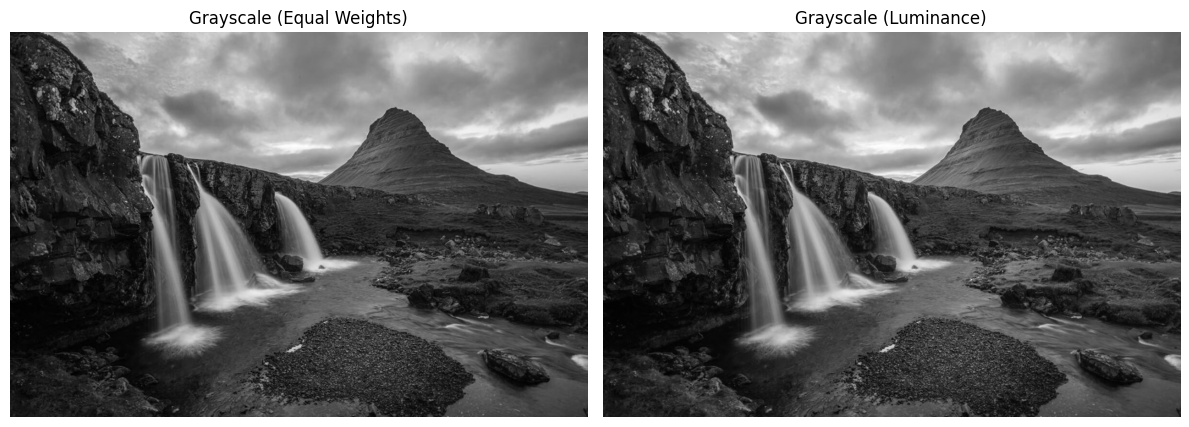

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(result_bw, cmap='gray')
axes[0].set_title('Grayscale (Equal Weights)')
axes[0].axis('off')

axes[1].imshow(result_bw_2, cmap='gray')
axes[1].set_title('Grayscale (Luminance)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [73]:
gray_pil = image.convert("L")
os.makedirs("outputs_workshop_2", exist_ok=True)
gray_pil.save("outputs_workshop_2/grayscale_builtin.png")

img_bw = Image.fromarray(result_bw.astype(np.uint8))
img_bw_2 = Image.fromarray(result_bw_2.astype(np.uint8))
img_bw.save("outputs_workshop_2/result_bw_equal.png")
img_bw_2.save("outputs_workshop_2/result_bw_luminance.png")

Built-in: (730, 1095)
Equal: (730, 1095)
Luminance: (730, 1095)
Difference Built-in vs Equal: 7.29
Difference Built-in vs Luminance: 0.52
Difference Equal vs Luminance: 6.78


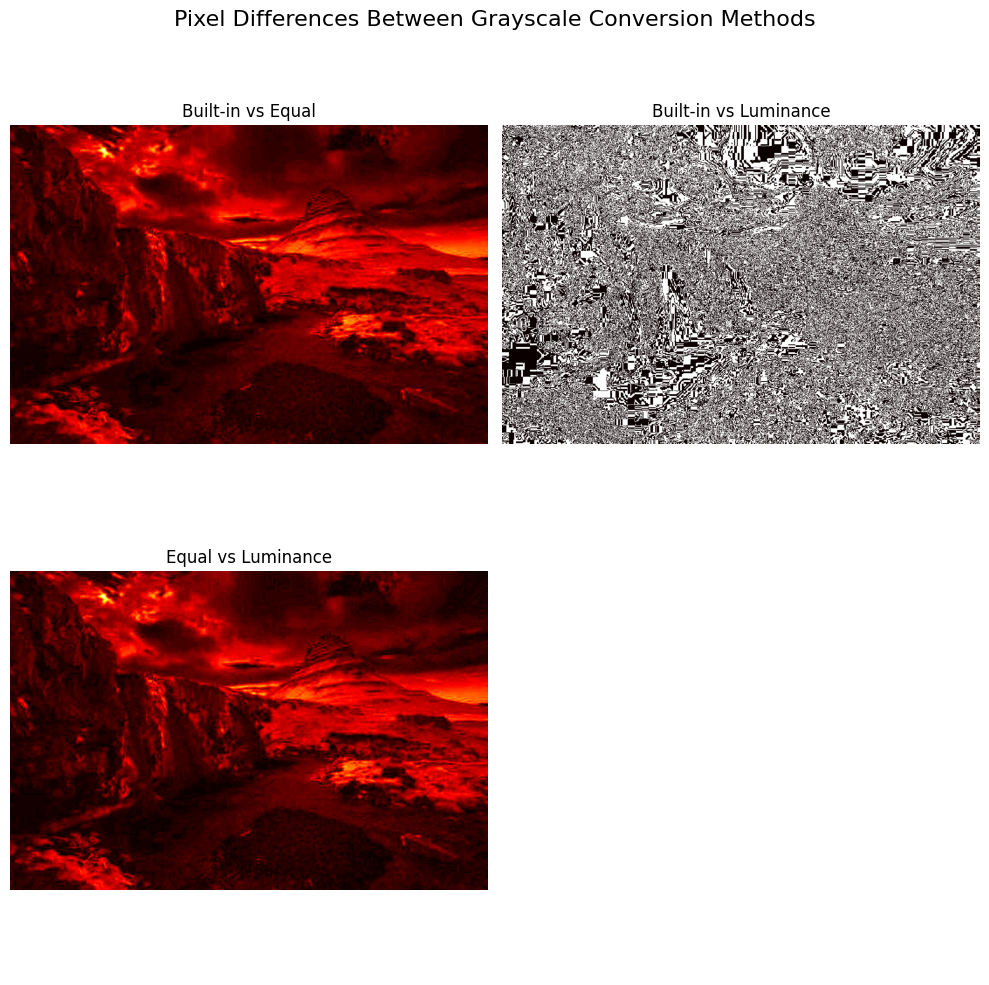

In [74]:
formats = ["Built-in", "Equal", "Luminance"]
paths = [
    "outputs_workshop_2/grayscale_builtin.png",
    "outputs_workshop_2/result_bw_equal.png",
    "outputs_workshop_2/result_bw_luminance.png"
]

images = {fmt: np.array(Image.open(path).convert("L")) for fmt, path in zip(formats, paths)}

for fmt, arr in images.items():
    print(f"{fmt}: {arr.shape}")

pairs = list(itertools.combinations(formats, 2))

# Plot difference maps
fig, axes = plt.subplots(len(pairs)//2 + len(pairs)%2, 2, figsize=(10, 10))
axes = axes.flatten()

for ax, (fmt1, fmt2) in zip(axes, pairs):
    img1, img2 = images[fmt1], images[fmt2]

    # Compute pixel difference
    diff = np.abs(img1.astype(int) - img2.astype(int))

    # Compute mean absolute error (MAE)
    mae = np.mean(diff)
    print(f"Difference {fmt1} vs {fmt2}: {mae:.2f}")

    # Normalize for visualization
    diff_display = diff / diff.max() if diff.max() != 0 else diff

    # Plot
    ax.imshow(diff_display, cmap="hot")
    ax.set_title(f"{fmt1} vs {fmt2}")
    ax.axis("off")

# Hide any unused subplot axes
for i in range(len(pairs), len(axes)):
    axes[i].axis("off")

plt.suptitle("Pixel Differences Between Grayscale Conversion Methods", fontsize=16)
plt.tight_layout()
plt.show()

## Workshop 3

1. Hacer un programa que lea una imagen en escala de grises y produzca el histograma correspondiente.

2. Hacer un programa que cargue una imagen a color y produzca el histograma con las líneas de colores RGB.

3. Cargar una imagen en escala de grises y hacer una función que ponga en un vector de 256 posiciones, los valores de frecuencias de pixels, usando ciclos para recorrer la imagen.

4. Hacer el Histograma correspondiente con el vector del ejercicio enterior.

5. Hacer lo mismo de los dos puntos anteriores con cada capa de una imagen en formato RGB.

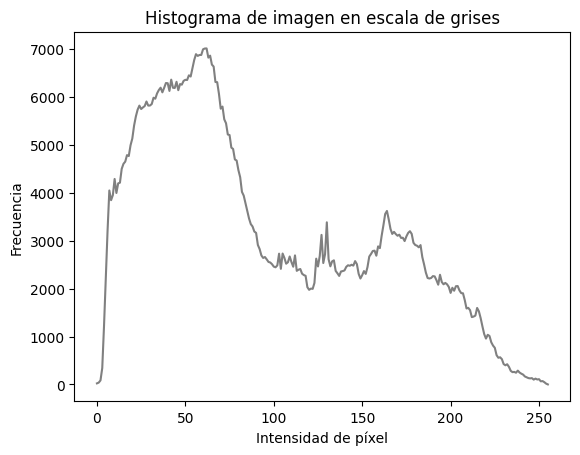

In [75]:
# Cargar la imagen en escala de grises
image = cv2.imread('images/kirkjufell.jpg',cv2.IMREAD_GRAYSCALE)

# Calcular el histograma
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Mostrar el histograma
plt.plot(histogram, color='gray')
plt.title('Histograma de imagen en escala de grises')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.show()

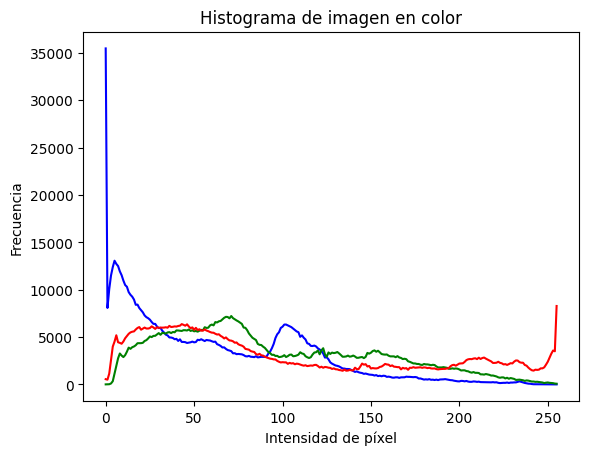

In [76]:
color_image = cv2.imread('images/kirkjufell.jpg')

# Separar los canales de color
canales = ('b', 'g', 'r')
for i, color in enumerate(canales):
    hist = cv2.calcHist([color_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)

plt.title('Histograma de imagen en color')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.show()

[  23   39   85  343 1221 2226 3205 4046 3844 3950 4286 3994 4194 4209
 4497 4602 4648 4784 4765 4990]


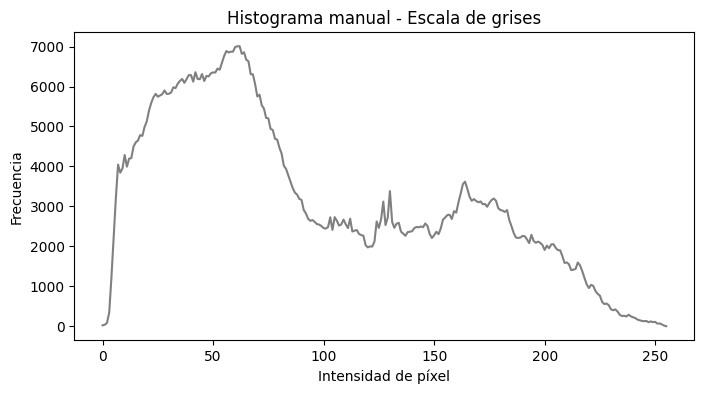

In [77]:
gray_image = cv2.imread('images/kirkjufell.jpg', cv2.IMREAD_GRAYSCALE)

# Create array
frequencies = np.zeros(256, dtype=int)

# Go over the image in a double loop
for i in range(gray_image.shape[0]):       # Rows
    for j in range(gray_image.shape[1]):   # Columns
        pixel_value = gray_image[i, j]
        frequencies[pixel_value] += 1


print(frequencies[:20]) 

plt.figure(figsize=(8, 4))
plt.plot(range(len(frequencies)), frequencies, color='gray')
plt.title('Histograma manual - Escala de grises')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.show()

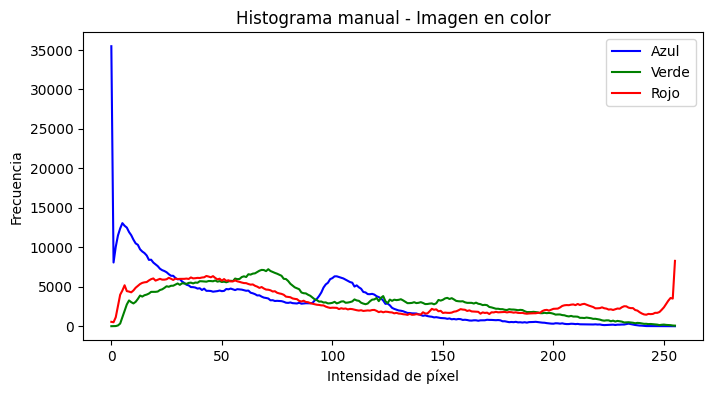

In [78]:
color_image = cv2.imread('images/kirkjufell.jpg')

# Separar los canales B, G, R
b_channel, g_channel, r_channel = cv2.split(color_image)
channels = [b_channel, g_channel, r_channel]
colors = ['b', 'g', 'r']
labels = ['Azul', 'Verde', 'Rojo']

plt.figure(figsize=(8, 4))

for channel, color, label in zip(channels, colors, labels):
    freq = np.zeros(256, dtype=int)
    for i in range(channel.shape[0]):
        for j in range(channel.shape[1]):
            pixel_value = channel[i, j]
            freq[pixel_value] += 1
    
    plt.plot(range(len(frequencies)), freq, color=color, label=label)

plt.title('Histograma manual - Imagen en color')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## Workshop 4

1. Hacer un programa que cargue una imagen en escala de grises y produzca otra equalizada haciendo uso de la función de ecualización brindada por el lenguaje utilizado.

2. Produzca una imagen comparativa entre los histogramas de las imágenes del punto anterior.

3. Aplicar una fórmula de ecualización para oscurecer la imagen original, oscureciendo los pixels en una tercera parte. Debe generar la imagen ecualizada y el histograma correspondiente.

4. Aplicar una fórmula de ecualización para aclarar la imagen original (por lo menos en un 30%). Debe generar la imagen ecualizada y el histograma correspondiente.

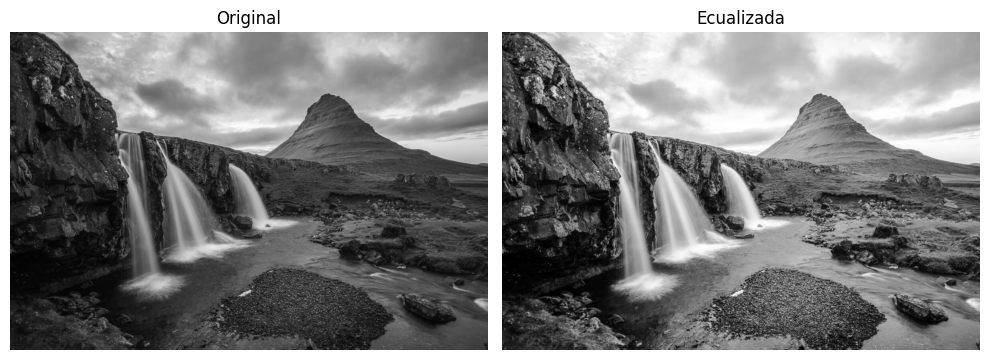

In [79]:
# Cargar imagen en escala de grises
imagen = cv2.imread('images/kirkjufell.jpg', cv2.IMREAD_GRAYSCALE)

# Ecualizar el histograma
imagenEcualizada = cv2.equalizeHist(imagen)

# Mostrar resultados
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Ecualizada')
plt.imshow(imagenEcualizada, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

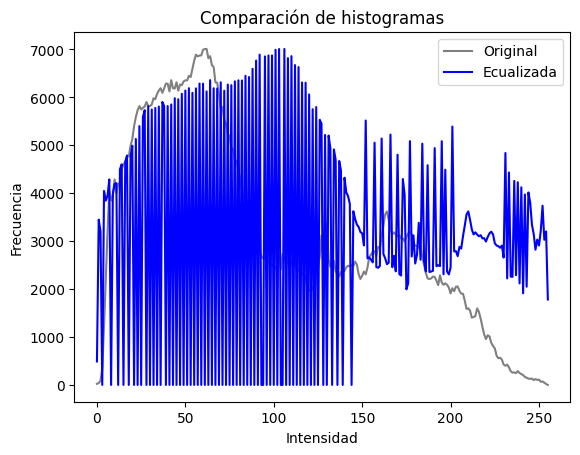

In [80]:
# Histograma original
hist_original = cv2.calcHist([imagen], [0], None, [256], [0, 256])

# Histograma ecualizado
hist_ecualizado = cv2.calcHist([imagenEcualizada], [0], None, [256], [0, 256])

# Mostrar histogramas
plt.plot(hist_original, label='Original', color='gray')
plt.plot(hist_ecualizado, label='Ecualizada', color='blue')
plt.title('Comparación de histogramas')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

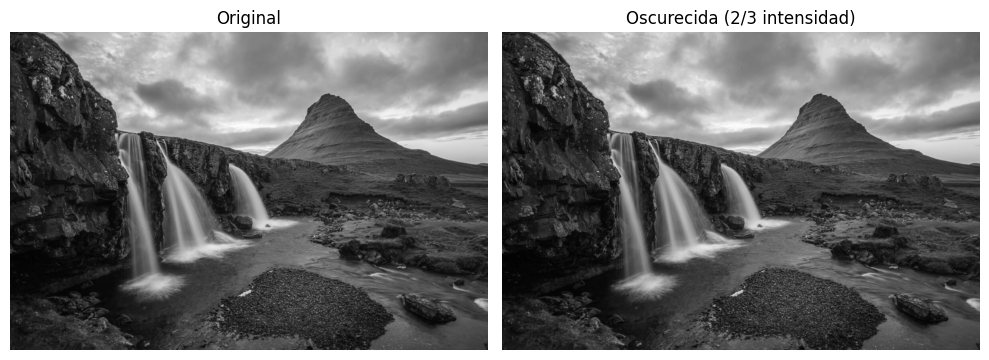

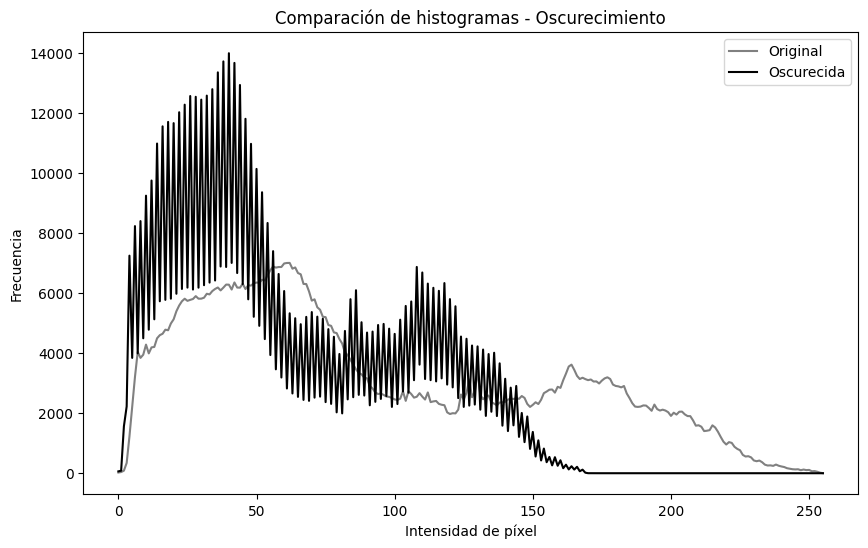

In [81]:
oscurecida = (imagen * (2/3)).astype(np.uint8)

# Mostrar imágenes comparativas
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Oscurecida (2/3 intensidad)')
plt.imshow(oscurecida, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


hist_original = cv2.calcHist([imagen], [0], None, [256], [0, 256])
hist_oscurecida = cv2.calcHist([oscurecida], [0], None, [256], [0, 256])


plt.figure(figsize=(10, 6))
plt.plot(hist_original, label='Original', color='gray')
plt.plot(hist_oscurecida, label='Oscurecida', color='black')
plt.title('Comparación de histogramas - Oscurecimiento')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

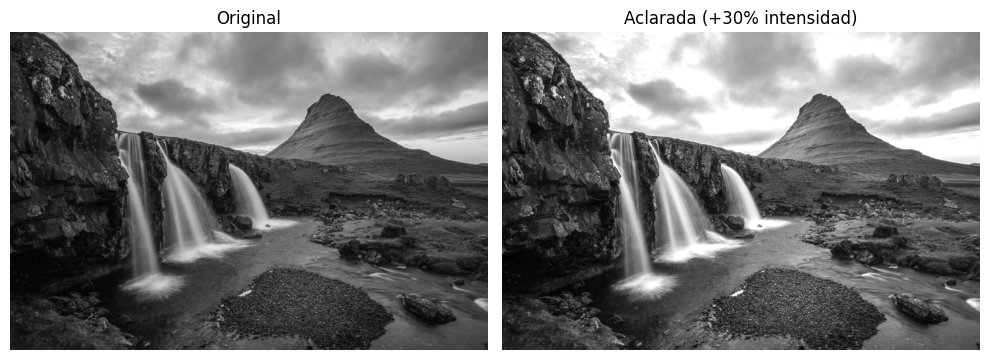

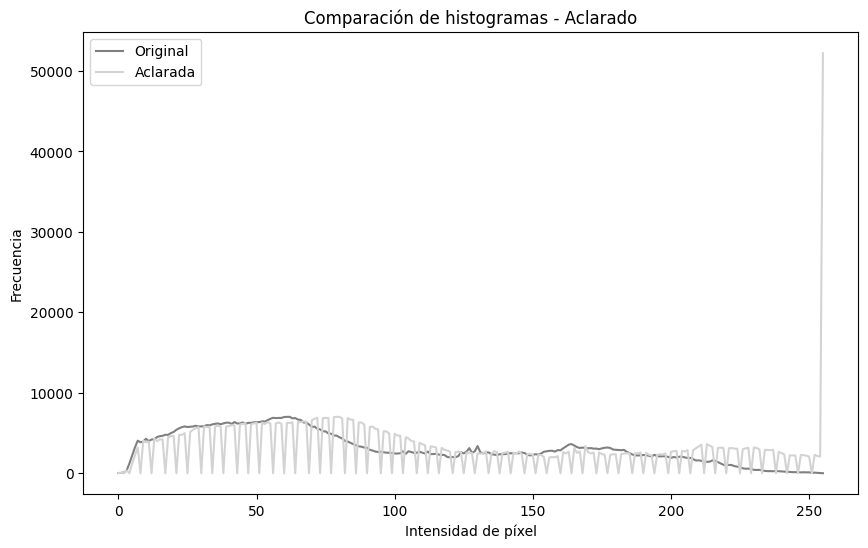

In [82]:
aclarada = np.clip((imagen * (1.3)), 0,255).astype(np.uint8)

# Mostrar imágenes comparativas
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Aclarada (+30% intensidad)')
plt.imshow(aclarada, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


hist_original = cv2.calcHist([imagen], [0], None, [256], [0, 256])
hist_aclarada = cv2.calcHist([aclarada], [0], None, [256], [0, 256])


plt.figure(figsize=(10, 6))
plt.plot(hist_original, label='Original', color='gray')
plt.plot(hist_aclarada, label='Aclarada', color='lightgray')
plt.title('Comparación de histogramas - Aclarado')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

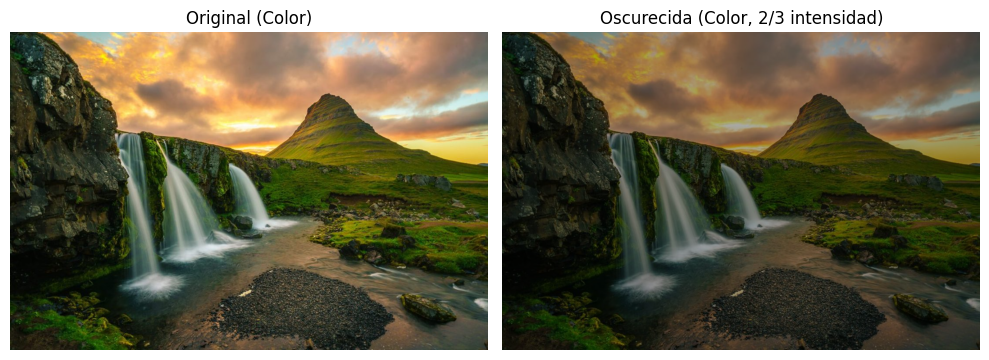

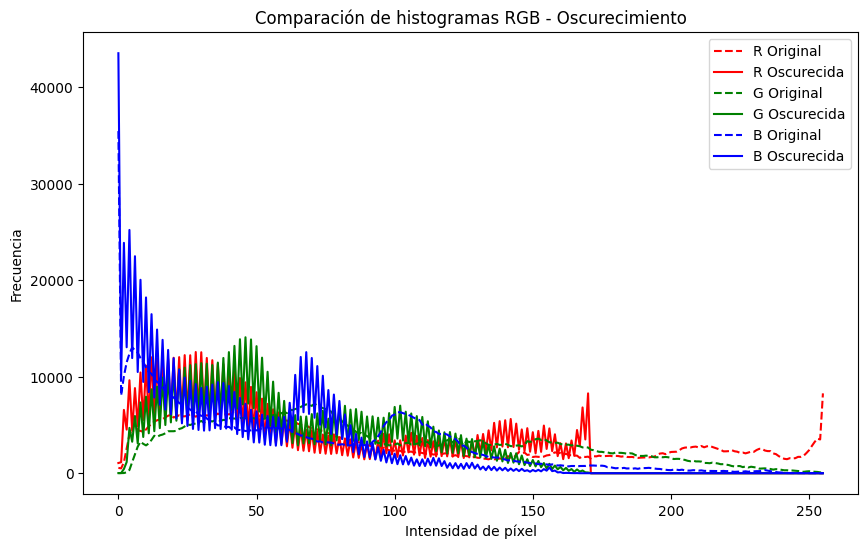

In [ ]:
# Cargar imagen a color
imagen_color = cv2.imread('images/kirkjufell.jpg')

# Convertir de BGR (OpenCV) a RGB (para matplotlib)
imagen_color_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)

# Oscurecer reduciendo la intensidad en 2/3
oscurecida_color = (imagen_color_rgb * (2/3)).astype(np.uint8)

# Mostrar imágenes comparativas
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Original (Color)')
plt.imshow(imagen_color_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Oscurecida (Color, 2/3 intensidad)')
plt.imshow(oscurecida_color)
plt.axis('off')

plt.tight_layout()
plt.show()

# Mostrar histogramas RGB comparativos
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 6))
for i, col in enumerate(colors):
    hist_original = cv2.calcHist([imagen_color_rgb], [i], None, [256], [0, 256])
    hist_oscurecida = cv2.calcHist([oscurecida_color], [i], None, [256], [0, 256])
    plt.plot(hist_original, color=col, linestyle='--', label=f'{col.upper()} Original')
    plt.plot(hist_oscurecida, color=col, label=f'{col.upper()} Oscurecida')

plt.title('Comparación de histogramas RGB - Oscurecimiento')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

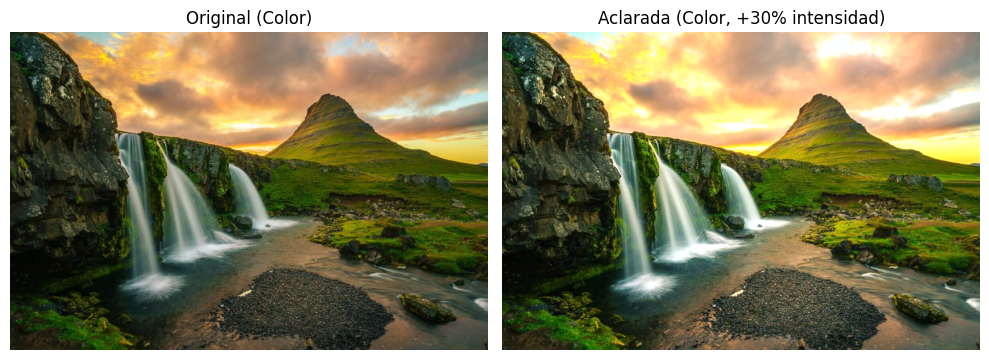

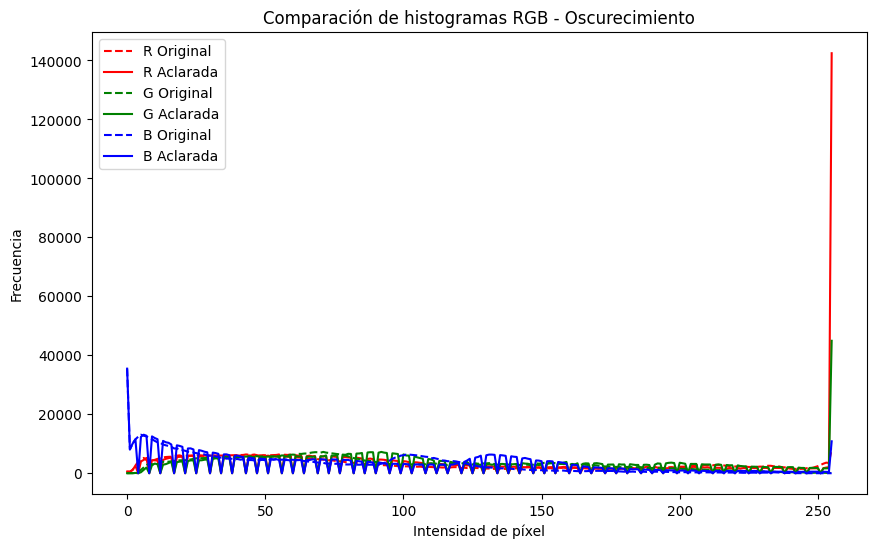

In [ ]:
# Cargar imagen a color
imagen_color = cv2.imread('images/kirkjufell.jpg')

# Convertir de BGR (OpenCV) a RGB (para matplotlib)
imagen_color_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)

# Oscurecer reduciendo la intensidad en 2/3

aclarada_color = np.clip((imagen_color_rgb * (1.3)), 0,255).astype(np.uint8)

# Mostrar imágenes comparativas
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Original (Color)')
plt.imshow(imagen_color_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Aclarada (Color, +30% intensidad)')
plt.imshow(aclarada_color)
plt.axis('off')

plt.tight_layout()
plt.show()

# Mostrar histogramas RGB comparativos
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 6))
for i, col in enumerate(colors):
    hist_original = cv2.calcHist([imagen_color_rgb], [i], None, [256], [0, 256])
    hist_oscurecida = cv2.calcHist([aclarada_color], [i], None, [256], [0, 256])
    plt.plot(hist_original, color=col, linestyle='--', label=f'{col.upper()} Original')
    plt.plot(hist_oscurecida, color=col, label=f'{col.upper()} Aclarada')

plt.title('Comparación de histogramas RGB - Oscurecimiento')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## Next workshop

5. Aplicar una fórmula de ecualización para lograr un contraste bajo en la imagen original. Debe generar la imagen ecualizada y el histograma correspondiente.

6. Aplicar una fórmula de ecualización para lograr un contraste alto en la imagen original. Debe generar la imagen ecualizada y el histograma correspondiente.

7. Aplicar una fórmula de ecualización lineal o no lineal en una imagen a color para cada una de las capas de la imagen. Debe mostrar la imagen original, la ecualizada y para cada capa la imagen y el histograma correspondiente

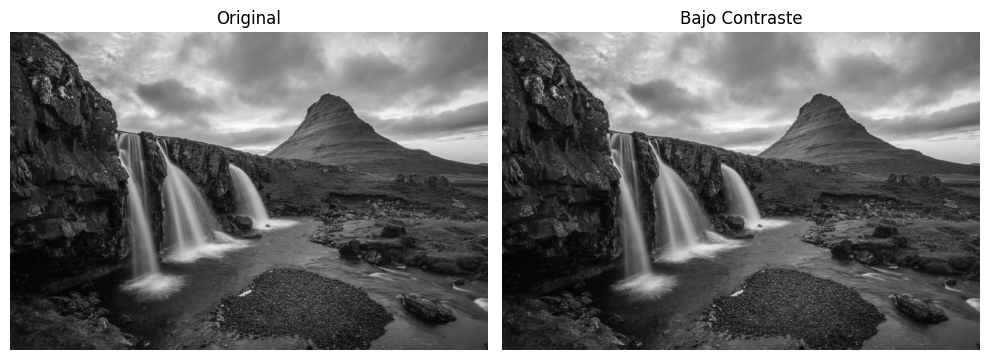

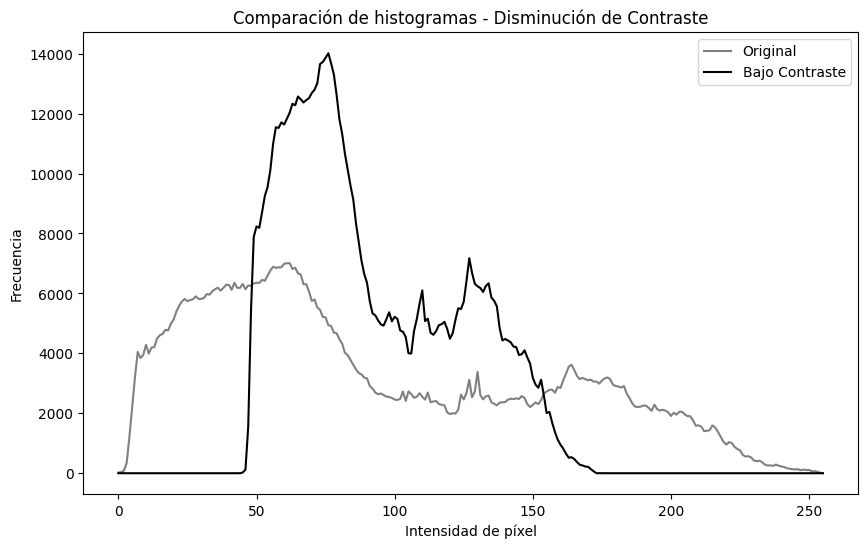

In [89]:
imagen = cv2.imread('images/kirkjufell.jpg', cv2.IMREAD_GRAYSCALE)

factor = 0.5  
mean = np.mean(imagen)
bajo_contraste = np.clip((imagen - mean) * factor + mean, 0, 255).astype(np.uint8)

# Mostrar comparativa
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Bajo Contraste')
plt.imshow(bajo_contraste, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Mostrar histogramas comparativos
hist_original = cv2.calcHist([imagen], [0], None, [256], [0, 256])
hist_bajo = cv2.calcHist([bajo_contraste], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.plot(hist_original, label='Original', color='gray')
plt.plot(hist_bajo, label='Bajo Contraste', color='black')
plt.title('Comparación de histogramas - Disminución de Contraste')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

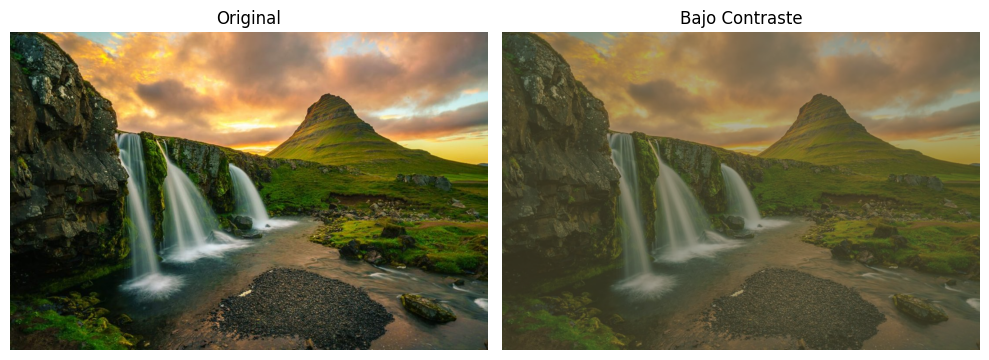

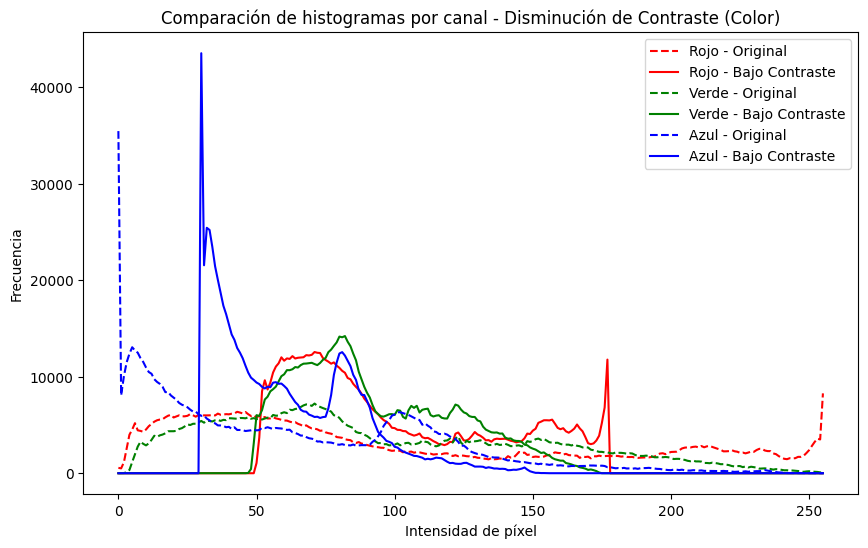

In [91]:
imagen = cv2.imread('images/kirkjufell.jpg')

# Convertir de BGR a RGB para mostrar correctamente con matplotlib
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Reducir contraste (factor < 1)
factor = 0.5  
bajo_contraste = np.zeros_like(imagen_rgb, dtype=np.uint8)

# Aplicar reducción de contraste a cada canal de color
for i in range(3):  # R, G, B
    canal = imagen_rgb[:, :, i]
    mean = np.mean(canal)
    canal_bajo = np.clip((canal - mean) * factor + mean, 0, 255)
    bajo_contraste[:, :, i] = canal_bajo

# Mostrar comparativa
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(imagen_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Bajo Contraste')
plt.imshow(bajo_contraste)
plt.axis('off')

plt.tight_layout()
plt.show()

# Mostrar histogramas comparativos (solo canal de luminancia aproximada)
colors = ('r', 'g', 'b')
labels = ('Rojo', 'Verde', 'Azul')

plt.figure(figsize=(10, 6))

for i, color in enumerate(colors):
    hist_original = cv2.calcHist([imagen_rgb], [i], None, [256], [0, 256])
    hist_bajo = cv2.calcHist([bajo_contraste], [i], None, [256], [0, 256])
    
    plt.plot(hist_original, color=color, linestyle='--', label=f'{labels[i]} - Original')
    plt.plot(hist_bajo, color=color, label=f'{labels[i]} - Bajo Contraste')

plt.title('Comparación de histogramas por canal - Disminución de Contraste (Color)')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

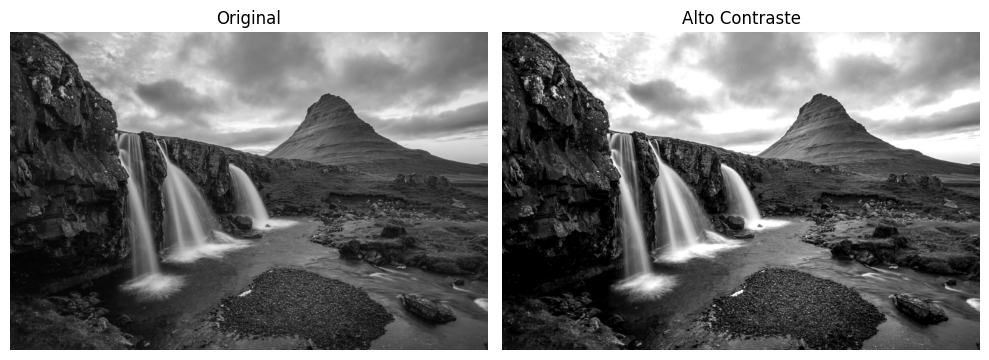

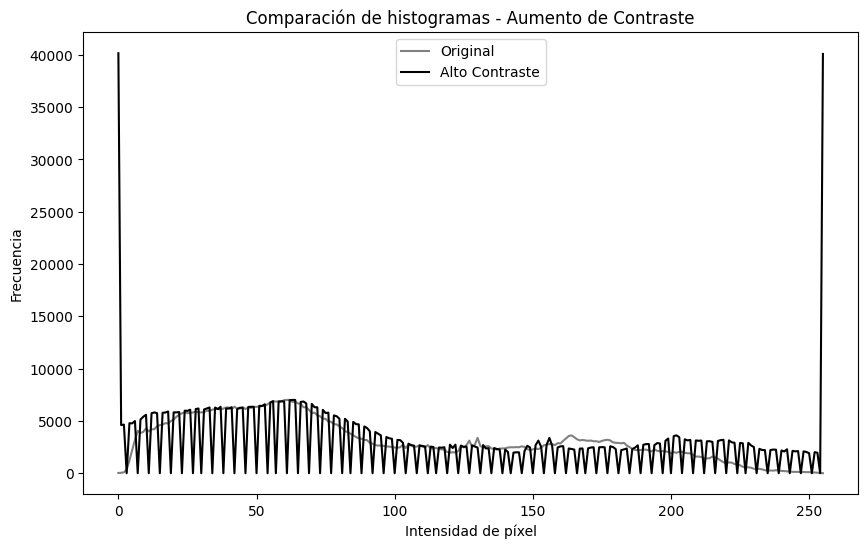

In [86]:
# Cargar imagen en escala de grises
imagen = cv2.imread('images/kirkjufell.jpg', cv2.IMREAD_GRAYSCALE)

# Calcular los valores mínimo y máximo de intensidad
lower, upper = np.percentile(imagen, (5, 95))

# Aplicar recorte y estiramiento de contraste
alto_contraste = np.clip((imagen - lower) * (255 / (upper - lower)), 0, 255).astype(np.uint8)

# Mostrar comparativa
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Alto Contraste')
plt.imshow(alto_contraste, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Mostrar histogramas comparativos
hist_original = cv2.calcHist([imagen], [0], None, [256], [0, 256])
hist_contraste = cv2.calcHist([alto_contraste], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.plot(hist_original, label='Original', color='gray')
plt.plot(hist_contraste, label='Alto Contraste', color='black')
plt.title('Comparación de histogramas - Aumento de Contraste')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

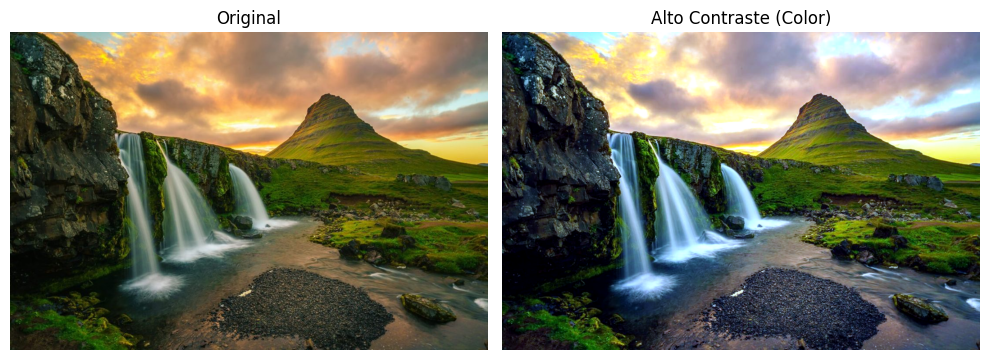

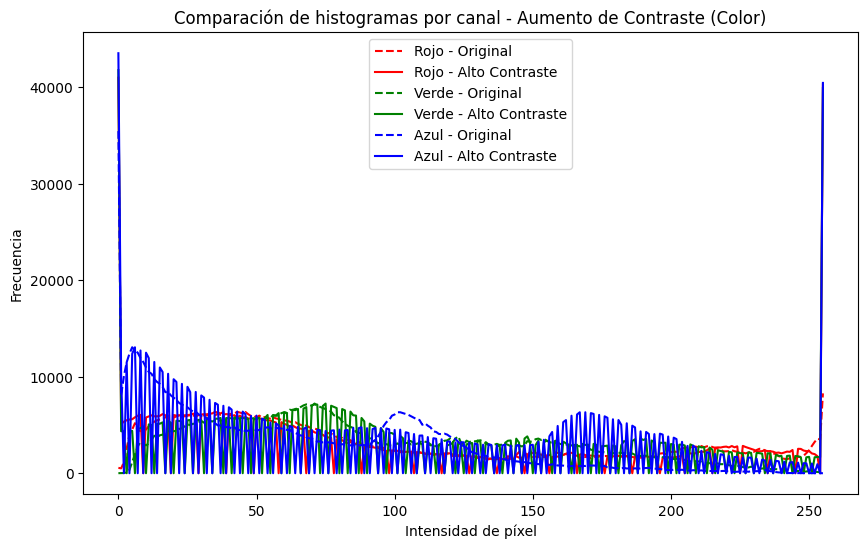

In [92]:
imagen = cv2.imread('images/kirkjufell.jpg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Calcular valores percentiles (5% y 95%) por canal
alto_contraste = np.zeros_like(imagen_rgb, dtype=np.uint8)
for i in range(3):  # R, G, B
    lower, upper = np.percentile(imagen_rgb[:, :, i], (5, 95))
    alto_contraste[:, :, i] = np.clip((imagen_rgb[:, :, i] - lower) * (255 / (upper - lower)), 0, 255)

# Mostrar comparativa
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(imagen_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Alto Contraste (Color)')
plt.imshow(alto_contraste)
plt.axis('off')

plt.tight_layout()
plt.show()

# Mostrar histogramas por canal (R, G, B)
colors = ('r', 'g', 'b')
labels = ('Rojo', 'Verde', 'Azul')

plt.figure(figsize=(10, 6))
for i, color in enumerate(colors):
    hist_original = cv2.calcHist([imagen_rgb], [i], None, [256], [0, 256])
    hist_contraste = cv2.calcHist([alto_contraste], [i], None, [256], [0, 256])
    
    plt.plot(hist_original, color=color, linestyle='--', label=f'{labels[i]} - Original')
    plt.plot(hist_contraste, color=color, label=f'{labels[i]} - Alto Contraste')

plt.title('Comparación de histogramas por canal - Aumento de Contraste (Color)')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

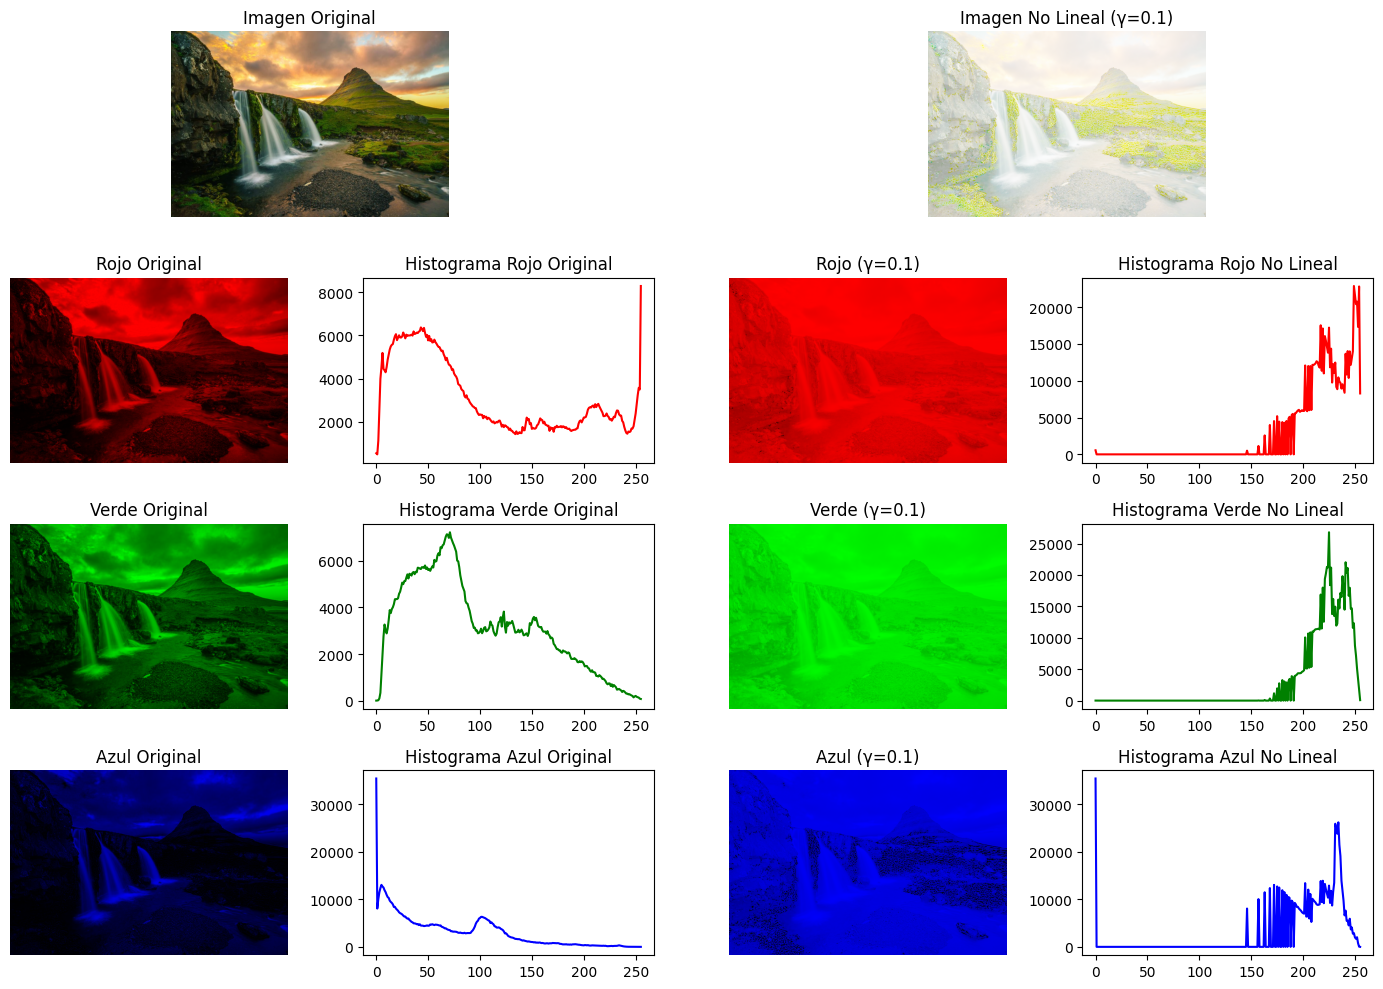

In [103]:
imagen = cv2.imread('images/kirkjufell.jpg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(imagen_rgb)

# Gamma Correction
def non_linear_equalization(channel, gamma=0.6):  # gamma < 1 = aclarar, gamma > 1 = oscurecer
    normalized = channel / 255.0
    corrected = np.power(normalized, gamma)
    return np.clip(corrected * 255, 0, 255).astype(np.uint8)


gamma = 0.1
r_eq = non_linear_equalization(r, gamma)
g_eq = non_linear_equalization(g, gamma)
b_eq = non_linear_equalization(b, gamma)


imagen_eq = cv2.merge((r_eq, g_eq, b_eq))

plt.figure(figsize=(14, 10))

plt.subplot(4, 2, 1)
plt.title('Imagen Original')
plt.imshow(imagen_rgb)
plt.axis('off')

plt.subplot(4, 2, 2)
plt.title(f'Imagen No Lineal (γ={gamma})')
plt.imshow(imagen_eq)
plt.axis('off')

colores = ['red', 'green', 'blue']
canales_originales = [r, g, b]
canales_ecualizados = [r_eq, g_eq, b_eq]
titulos = ['Rojo', 'Verde', 'Azul']

for i, (canal_ori, canal_eq, color, titulo) in enumerate(zip(canales_originales, canales_ecualizados, colores, titulos)):
    row = i + 1

    # Canal original
    canal_color_ori = np.zeros_like(imagen_rgb)
    canal_color_ori[..., i] = canal_ori

    plt.subplot(4, 4, 4*row + 1)
    plt.title(f'{titulo} Original')
    plt.imshow(canal_color_ori)
    plt.axis('off')

    # Histograma original
    plt.subplot(4, 4, 4*row + 2)
    hist_ori = cv2.calcHist([canal_ori], [0], None, [256], [0, 256])
    plt.plot(hist_ori, color=color)
    plt.title(f'Histograma {titulo} Original')

    # Canal ecualizado
    canal_color_eq = np.zeros_like(imagen_rgb)
    canal_color_eq[..., i] = canal_eq

    plt.subplot(4, 4, 4*row + 3)
    plt.title(f'{titulo} (γ={gamma})')
    plt.imshow(canal_color_eq)
    plt.axis('off')

    # Histograma ecualizado
    plt.subplot(4, 4, 4*row + 4)
    hist_eq = cv2.calcHist([canal_eq], [0], None, [256], [0, 256])
    plt.plot(hist_eq, color=color)
    plt.title(f'Histograma {titulo} No Lineal')

plt.tight_layout()
plt.show()